In [36]:
from src.get_modelnet40.load_data import get_dls_for_viz
from src.it_net.it_net import ITNet
import torch

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pyvista as pv
from tqdm import tqdm

In [2]:
from src.pretrain_utils.transforms import quaternion_to_matrix, apply_tfm, compose_tfms
from src.pretrain_utils.corruptions import tfm_from_rand_pose, create_random_transform

In [3]:
device = "mps"
batch_size = 64

In [4]:
checkpoint = torch.load("results/it_net2/checkpoint.pth")

model = ITNet(channel=3, num_iters=5).to(device)
model.load_state_dict(checkpoint["model"])
model = model.eval()

In [7]:
train_loader = get_dls_for_viz(batch_size=batch_size)
batch = next(iter(train_loader))

In [13]:
batch_point_clouds = batch["pointcloud"].to(torch.float32).to(device)
batch_point_clouds = batch_point_clouds.transpose(1, 2)

In [14]:
index = 22
category = batch["category"][index].item()
print(f"Category: {category}")

Category: 16


## View 1

In [15]:
tfm = create_random_transform(batch_size, 30, 0, batch_point_clouds.dtype).to(batch_point_clouds.device)
view_1 = apply_tfm(batch_point_clouds, tfm)
view_1.shape

# view_1 = batch_point_clouds.float()
# view_1.shape

torch.Size([64, 3, 1024])

In [16]:
x = view_1[index,0,:].cpu().numpy()
y = view_1[index,1,:].cpu().numpy()
z = view_1[index,2,:].cpu().numpy()

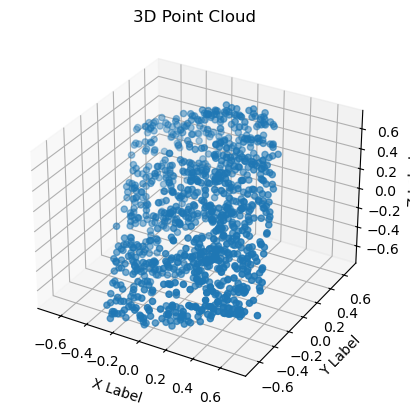

In [52]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z)

# Set labels and title
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_title('3D Point Cloud')

ax.set_xlim(-0.75, 0.75)
ax.set_ylim(-0.75, 0.75)
ax.set_zlim(-0.75, 0.75)

plt.show()

# # points is a 3D numpy array (n_points, 3) coordinates of a sphere
# points = view_1[index,:,:].transpose(0, 1).detach().cpu().numpy()
# cloud = pv.PolyData(points)
# # cloud.plot()

# volume = cloud.delaunay_3d(alpha=2.)
# shell = volume.extract_geometry()
# shell.plot()

## View 1 - Post

In [38]:
view_1_post, _, _ = model(view_1)
view_1_post.shape

torch.Size([64, 3, 1024])

In [39]:
x = view_1_post[index,0,:].detach().cpu().numpy()
y = view_1_post[index,1,:].detach().cpu().numpy()
z = view_1_post[index,2,:].detach().cpu().numpy()

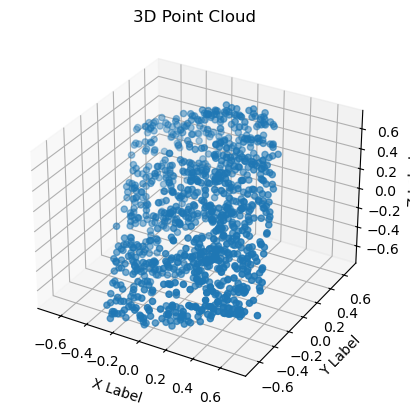

In [53]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z)

# Set labels and title
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_title('3D Point Cloud')

ax.set_xlim(-0.75, 0.75)
ax.set_ylim(-0.75, 0.75)
ax.set_zlim(-0.75, 0.75)

plt.show()

# # points is a 3D numpy array (n_points, 3) coordinates of a sphere
# points = view_1_post[index,:,:].transpose(0, 1).detach().cpu().numpy()
# cloud = pv.PolyData(points)
# # cloud.plot()

# volume = cloud.delaunay_3d(alpha=2.)
# shell = volume.extract_geometry()
# shell.plot()

## View 2

In [41]:
tfm = create_random_transform(batch_size, 30, 0, view_1.dtype).to(view_1.device)
view_2 = apply_tfm(view_1, tfm)
view_2.shape

torch.Size([64, 3, 1024])

In [54]:
x = view_2[index,0,:].cpu().numpy()
y = view_2[index,1,:].cpu().numpy()
z = view_2[index,2,:].cpu().numpy()

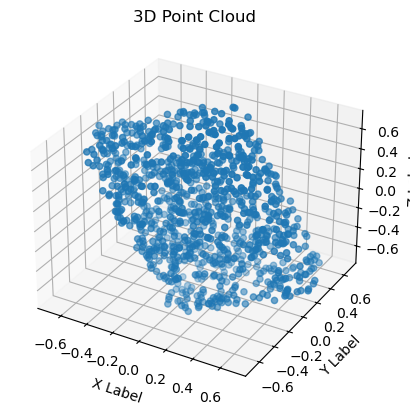

In [55]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z)

# Set labels and title
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_title('3D Point Cloud')

ax.set_xlim(-0.75, 0.75)
ax.set_ylim(-0.75, 0.75)
ax.set_zlim(-0.75, 0.75)

plt.show()

# # points is a 3D numpy array (n_points, 3) coordinates of a sphere
# points = view_2[index,:,:].transpose(0, 1).detach().cpu().numpy()
# cloud = pv.PolyData(points)
# # cloud.plot()

# volume = cloud.delaunay_3d(alpha=2.)
# shell = volume.extract_geometry()
# shell.plot()

## View 2 - Post

In [56]:
view_2_post, _, _ = model(view_2)
view_2_post.shape

torch.Size([64, 3, 1024])

In [925]:
x = view_2_post[index,0,:].detach().cpu().numpy()
y = view_2_post[index,1,:].detach().cpu().numpy()
z = view_2_post[index,2,:].detach().cpu().numpy()

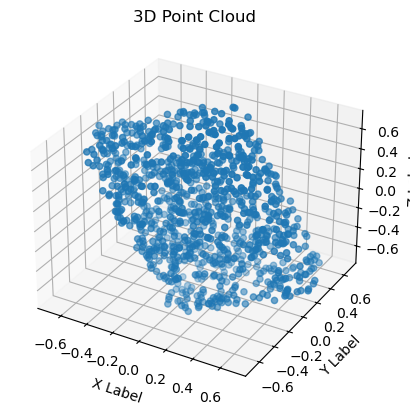

: 

In [57]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z)

# Set labels and title
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_title('3D Point Cloud')

ax.set_xlim(-0.75, 0.75)
ax.set_ylim(-0.75, 0.75)
ax.set_zlim(-0.75, 0.75)

plt.show()

# # points is a 3D numpy array (n_points, 3) coordinates of a sphere
# points = view_2_post[index,:,:].transpose(0, 1).detach().cpu().numpy()
# cloud = pv.PolyData(points)
# # cloud.plot()

# volume = cloud.delaunay_3d(alpha=2.)
# shell = volume.extract_geometry()
# shell.plot()

In [46]:
# # Create a 3D scatter plot
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(x, y, z)

# # Convert points to mesh
# triangles = ax.plot_trisurf(x, y, z, cmap='viridis', edgecolor='none')

# # Set all axes to the same amount
# max_value = max(np.max(x), np.max(y), np.max(z))
# min_value = min(np.min(x), np.min(y), np.min(z))
# ax.set_xlim(min_value, max_value)
# ax.set_ylim(min_value, max_value)
# ax.set_zlim(min_value, max_value)

# # Set labels and title
# ax.set_xlabel('X Label')
# ax.set_ylabel('Y Label')
# ax.set_zlabel('Z Label')
# ax.set_title('3D Point Cloud')

# plt.show()

In [47]:
# import pyvista as pv

# # points is a 3D numpy array (n_points, 3) coordinates of a sphere
# cloud = pv.PolyData(points)
# cloud.plot()

# volume = cloud.delaunay_3d(alpha=2.)
# shell = volume.extract_geometry()
# shell.plot()

## Difference

In [48]:
class PLoss(torch.nn.Module):
    def __init__(self):
        super(PLoss, self).__init__()

    def forward(self, pc1, pc2):
        pointwise_distance = torch.sum((pc1 - pc2)**2, dim=1) # BxN
        pc_mean_distance = torch.mean(pointwise_distance, dim=1) # B
        loss = torch.mean(pc_mean_distance)
        return loss

In [49]:
ploss = PLoss()

v1_v2_diff = ploss(view_1, view_2)
print(f"Difference between View 1 & View 2: {v1_v2_diff.item()}")

v1_v2_diff_post = ploss(view_1_post, view_2_post)
print(f"Post, Difference between View 1 & View 2: {v1_v2_diff_post.item()}")

Difference between View 1 & View 2: 0.9733927249908447
Post, Difference between View 1 & View 2: 0.6621601581573486
